# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-02-24 16:26:21.600347: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 16:26:21.644014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-24 16:26:21.685320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-24 16:26:21.697348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-24 16:26:21.730028: I tensorflow/core/platform/cpu_feature_guar

In [2]:
grae_results = read_all_graeBuild_results()

In [3]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_percent,Anchor_Percent
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772,0.3,NaN
1,MASH,iris,skewed,100,anchor_loss100,0.006816,0.866667,0.866667,0.833333,0.866667,...,0.900000,0.866667,0.899542,0.864815,0.933333,0.900000,0.932407,0.897176,0.3,NaN
2,MASH,parkinsons,skewed,100,original,0.016461,0.871795,0.794872,0.794872,0.794872,...,0.692308,0.769231,0.682228,0.756879,0.897436,0.846154,0.897436,0.834188,0.3,NaN
3,MAGAN,ComputerHardware,distort,100,anchor_loss100,0.025578,0.664873,0.707875,0.631856,0.428433,...,0.696675,0.867351,0.436569,0.288703,0.678965,0.628077,0.449133,0.483420,0.3,NaN
4,MASH-,ConcreteSlumpTest,skewed,100,anchor_loss150,0.073414,0.548429,-0.388599,-0.179322,1.067226,...,0.125127,-0.228325,0.847111,1.003748,0.196662,0.127045,0.811740,0.846182,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,JLMA,balance_scale,turn,100,anchor_loss150,0.028080,0.776000,0.768000,0.784000,0.745829,...,0.768000,0.752000,0.745829,0.740329,0.776000,0.808000,0.753442,0.796101,0.3,NaN
4718,MASH,hepatitis,distort,100,anchor_loss050,0.001992,0.790909,0.500000,0.500000,0.489583,...,0.607143,0.607143,0.602581,0.594203,0.571429,0.464286,0.569231,0.463602,0.3,NaN
4719,SSMA,EnergyEfficiency,distort,100,anchor_loss050,0.096418,-0.004676,0.683923,0.513577,0.573306,...,-0.118302,-0.336778,1.078373,1.179015,0.448091,-0.116497,0.757571,1.077503,0.3,NaN
4720,MASH,ionosphere,even,100,anchor_loss150,0.022049,0.898214,0.802817,0.873239,0.792015,...,0.802817,0.788732,0.797174,0.775473,0.746479,0.788732,0.732590,0.775473,0.3,NaN


In [4]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,...,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_percent,Anchor_Percent
0,anchor_loss050,0.079234,0.584761,0.607432,0.588303,0.673540,0.678108,0.525275,0.496195,0.661157,...,0.507647,0.465077,0.655745,0.669471,0.578919,0.543550,0.666342,0.669837,0.3,1.0
1,anchor_loss100,0.079393,0.588338,0.613497,0.590465,0.672698,0.679529,0.527887,0.498895,0.659936,...,0.511360,0.471706,0.655441,0.669448,0.582892,0.545905,0.665677,0.671044,0.3,1.0
2,anchor_loss150,0.078980,0.587319,0.611767,0.592773,0.672506,0.676457,0.527305,0.501907,0.660945,...,0.510628,0.471408,0.654246,0.668505,0.584461,0.548958,0.663646,0.667131,0.3,1.0
3,original,0.078808,0.587948,0.609175,0.587091,0.671439,0.678181,0.526403,0.500649,0.659924,...,0.508147,0.472226,0.653095,0.669403,0.579711,0.550933,0.664673,0.669759,0.3,1.0


In [5]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_percent,Anchor_Percent
0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,3.0,4.0,4.0
1,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0
2,3.0,3.0,2.0,2.0,1.0,4.0,3.0,1.0,1.0,4.0,4.0
3,2.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0


In [6]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    28.0
1    37.0
2    28.0
3    29.0
dtype: float64

In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    6.645585
1    6.666350
2    6.660888
3    6.659556
dtype: float64

In [8]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB', 'Anchor_percent', 'Anchor_Percent'],
      dtype='object')

<Axes: title={'center': 'Results'}, xlabel='grae_build'>

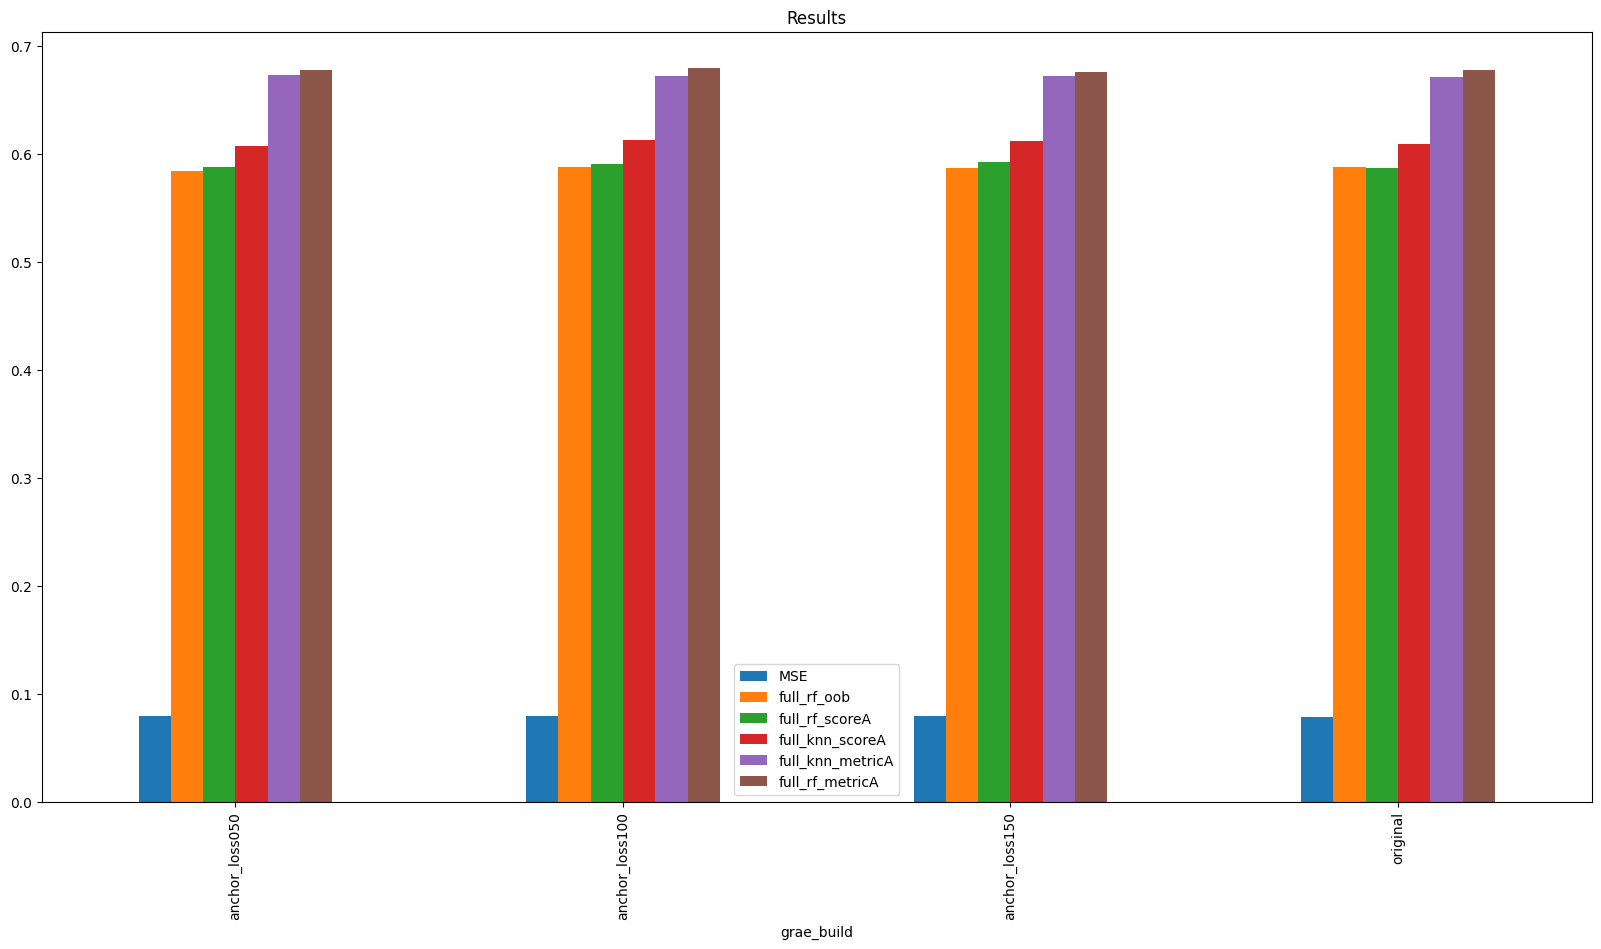

In [9]:
Col = grae_results.columns[4:][[0,1, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Results", figsize=(20,10))

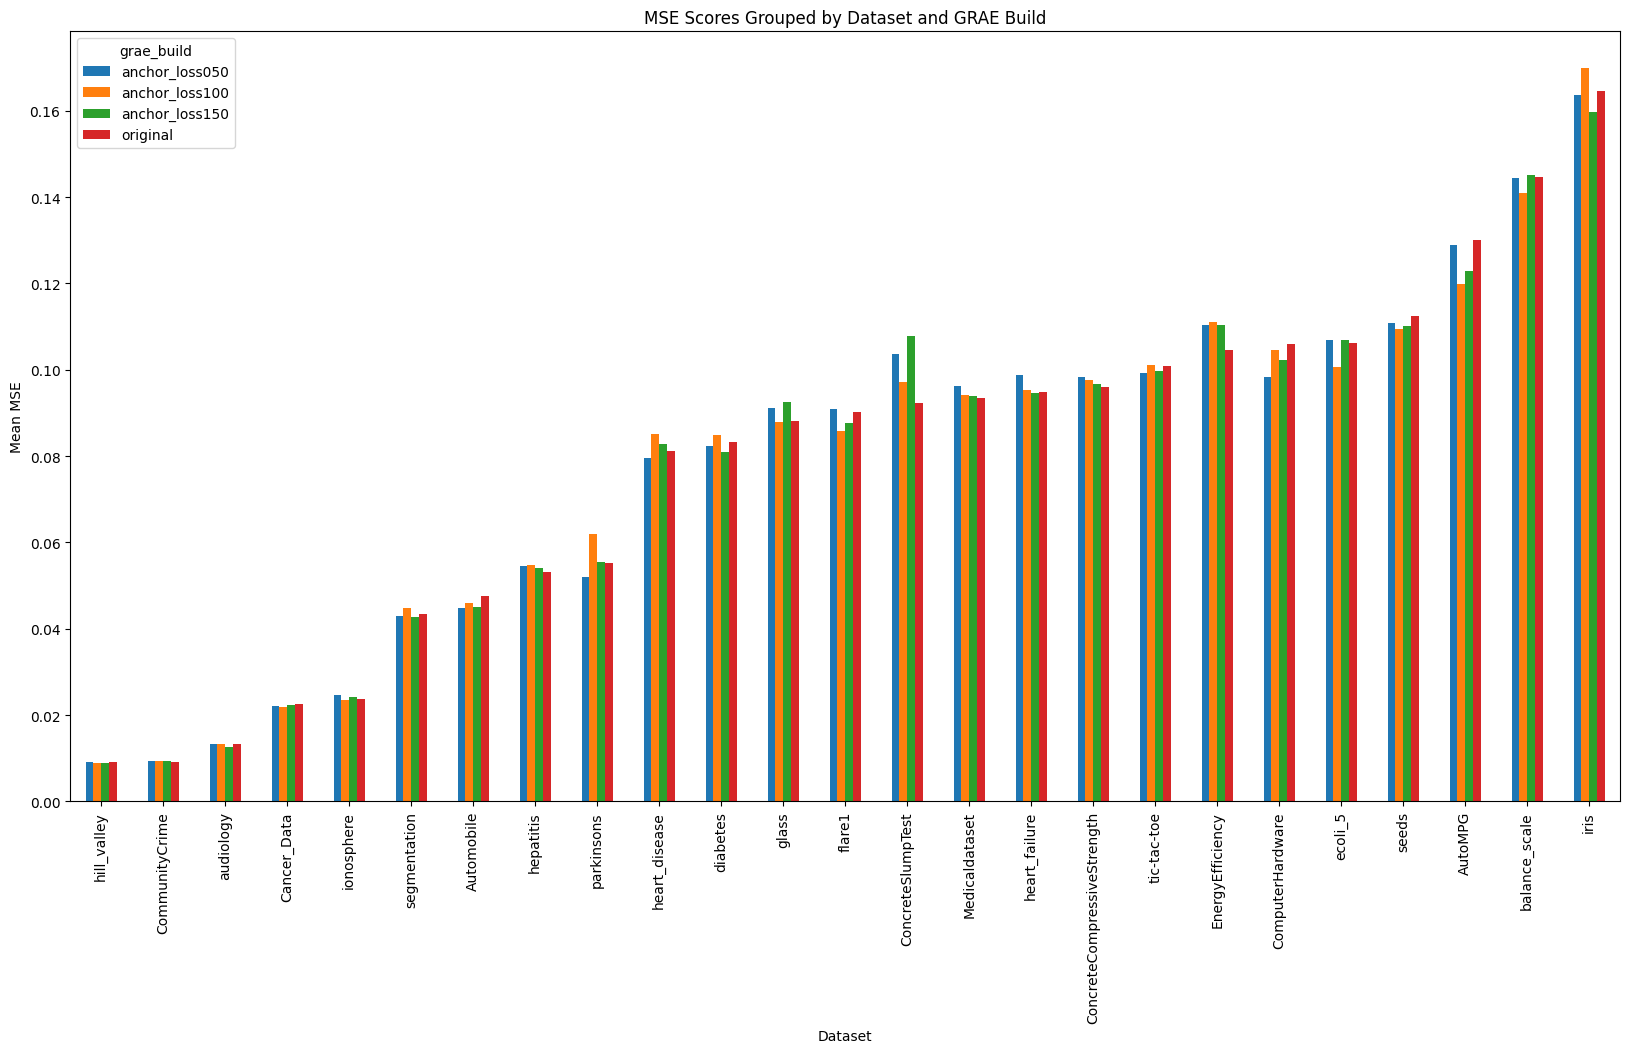

In [11]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])[["full_knn_scoreB", 'pred_knn_scoreB']].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

# Testing the Pipeline

In [12]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_parrelization(extract_all_files())
tasks[0:3]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  4921),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  1906)]

In [26]:
task_iris = next(task for task in tasks if task[1] == 'iris')
task_iris

('JLMA',
 'iris',
 'even',
 {'knn': 2, 'normalized_laplacian': True, 'd': 2, 'mu': 1},
 1,
 'anchor_loss050',
 42)

In [3]:
GRAE_tests(*tasks[15])

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/MAPA_ComputerHardware_turn_graeBuild_anchor_loss100_lam_100_seed42_an1.json


True

In [28]:
#Get the embeddings
emb_pred, emb_full, labels = get_embeddings(*task_iris)

# Calculate MSE between embeddings
train_len = len(labels[0])
test_len = train_len + len(labels[1])
mse_emb_pred = np.vstack([emb_pred[train_len:test_len], emb_pred[test_len + train_len:]])
mse_emb_full = np.vstack([emb_full[train_len:test_len], emb_full[test_len + train_len:]])
mse = mean_squared_error(mse_emb_pred, mse_emb_full)

KeyboardInterrupt: 